In [1]:
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import cmaps

In [2]:
#  Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([1, 8]))
]
selected_dates = filtered_df['date'].dt.date  # Convert to datetime.date for comparison

# Define paths to the NetCDF files
file_first_scripts = [
    'Data_TC/Spatial/Genesis/week1_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/Genesis/week2_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/week3_lag0_ddaily_Genesis_density_five_degre.nc',  
    'Data_TC/Spatial/Genesis/IBTrACS_Genesis_density.nc'
]

# Initialize lists to store results for each week
week1_81 = None
week2_81 = None
week3_81 = None
Obs_81 = None  # New variable for the new file

# Loop through each file_first_script
for i, file_first_script in enumerate(file_first_scripts):

    # Load the NetCDF files
    ds_first = Dataset(file_first_script)

    # Extract time, latitude, and longitude
    time_first = ds_first.variables['time'][:]
    lats = ds_first.variables['lat'][:]
    lons = ds_first.variables['lon'][:]

    # Convert time to datetime objects
    time_units_first = ds_first.variables['time'].units
    calendar_first = ds_first.variables['time'].calendar if 'calendar' in ds_first.variables['time'].ncattrs() else 'gregorian'
    dates_first = num2date(time_first, units=time_units_first, calendar=calendar_first)

    # Convert cftime datetime objects to numpy.datetime64
    dates_first = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_first])

    # Define the time range
    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    # Filter time steps within the specified range for both datasets
    mask_first = (dates_first >= start_date) & (dates_first <= end_date)

    # Extract data for the filtered time steps
    TCG_first = ds_first.variables['track_density'][mask_first, :, :]

    # Extract filtered dates for debugging
    filtered_dates_first = dates_first[mask_first]

    # Filter the data based on the selected dates from the CSV
    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_first, selected_dates_np)

    # Apply the mask to the data
    TCG_first_selected = TCG_first[mask_selected_dates, :, :]

    # Northern Hemisphere: May to october (months 5 to 10)
    month_mask_north = (filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    # Southern Hemisphere: December, January, February, March, April (months 11, 12, 1, 2, 3, 4)
    month_mask_south = (filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )
    # Apply the month masks based on latitude
    # Northern Hemisphere (lats >= 0)
    north_mask = lats >= 0  # Boolean mask for Northern Hemisphere latitudes
    TCG_first_north = TCG_first_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    # Southern Hemisphere (lats < 0)
    south_mask = lats < 0  # Boolean mask for Southern Hemisphere latitudes
    TCG_first_south = TCG_first_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    # Combine the data for Northern and Southern Hemispheres
    sum_north = np.sum(TCG_first_north, axis=0)
    sum_south = np.sum(TCG_first_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCG_first_selected[0, :, :], np.nan)  # Initialize with NaN
    result[north_mask, :] = sum_north  # Fill Northern Hemisphere
    result[south_mask, :] = sum_south  # Fill Southern Hemisphere

    # Scale the data
    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    # Store the results for each week
    if i == 0:
        week1_81 = k_filtered_clipped/16
    elif i == 1:
        week2_81 = k_filtered_clipped/16
    elif i == 2:
        week3_81 = k_filtered_clipped/16
    elif i == 3:
        Obs_81 = k_filtered_clipped  # Store results for the new file



In [3]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([2, 3]))
]
selected_dates = filtered_df['date'].dt.date  # Convert to datetime.date for comparison

# Define paths to the NetCDF files
file_second_scripts = [
    'Data_TC/Spatial/Genesis/week1_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/Genesis/week2_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/week3_lag0_ddaily_Genesis_density_five_degre.nc',  
    'Data_TC/Spatial/Genesis/IBTrACS_Genesis_density.nc'
]

# Initialize lists to store results for each week
week1_23 = None
week2_23 = None
week3_23 = None
Obs_23 = None  # New variable for the new file

# Loop through each file_secondscript
for i, file_second_script in enumerate(file_second_scripts):

    # Load the NetCDF files
    ds_second = Dataset(file_second_script)

    # Extract time, latitude, and longitude
    time_second = ds_second.variables['time'][:]
    lats = ds_second.variables['lat'][:]
    lons = ds_second.variables['lon'][:]

    # Convert time to datetime objects
    time_units_second = ds_second.variables['time'].units
    calendar_second = ds_second.variables['time'].calendar if 'calendar' in ds_second.variables['time'].ncattrs() else 'gregorian'
    dates_second = num2date(time_second, units=time_units_second, calendar=calendar_second)

    # Convert cftime datetime objects to numpy.datetime64
    dates_second = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_second])

    # Define the time range
    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    # Filter time steps within the specified range for both datasets
    mask_second = (dates_second >= start_date) & (dates_second <= end_date)

    # Extract data for the filtered time steps
    TCG_second = ds_second.variables['track_density'][mask_second, :, :]

    # Extract filtered dates for debugging
    filtered_dates_second = dates_second[mask_second]

    # Filter the data based on the selected dates from the CSV
    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_second, selected_dates_np)

    # Apply the mask to the data
    TCG_second_selected = TCG_second[mask_selected_dates, :, :]

    # Northern Hemisphere: May to october (months 5 to 10)
    month_mask_north = (filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    # Southern Hemisphere: December, January, February, March, April (months 11, 12, 1, 2, 3, 4)
    month_mask_south = (filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )
    # Apply the month masks based on latitude
    # Northern Hemisphere (lats >= 0)
    north_mask = lats >= 0  # Boolean mask for Northern Hemisphere latitudes
    TCG_second_north = TCG_second_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    # Southern Hemisphere (lats < 0)
    south_mask = lats < 0  # Boolean mask for Southern Hemisphere latitudes
    TCG_second_south = TCG_second_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    # Combine the data for Northern and Southern Hemispheres
    sum_north = np.sum(TCG_second_north, axis=0)
    sum_south = np.sum(TCG_second_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCG_second_selected[0, :, :], np.nan)  # Initialize with NaN
    result[north_mask, :] = sum_north  # Fill Northern Hemisphere
    result[south_mask, :] = sum_south  # Fill Southern Hemisphere

    # Scale the data
    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    # Store the results for each week
    if i == 0:
        week1_23 = k_filtered_clipped/16
    elif i == 1:
        week2_23 = k_filtered_clipped/16
    elif i == 2:
        week3_23 = k_filtered_clipped/16
    elif i == 3:
        Obs_23 = k_filtered_clipped  # Store results for the new file



In [4]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([4, 5]))
]
selected_dates = filtered_df['date'].dt.date  # Convert to datetime.date for comparison

# Define paths to the NetCDF files
file_third_scripts = [
    'Data_TC/Spatial/Genesis/week1_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/Genesis/week2_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/week3_lag0_ddaily_Genesis_density_five_degre.nc',  
    'Data_TC/Spatial/Genesis/IBTrACS_Genesis_density.nc'
]

# Initialize lists to store results for each week
week1_45 = None
week2_45 = None
week3_45 = None
Obs_45 = None  # New variable for the new file

# Loop through each file_thirdscript
for i, file_third_script in enumerate(file_third_scripts):

    # Load the NetCDF files
    ds_third = Dataset(file_third_script)

    # Extract time, latitude, and longitude
    time_third = ds_third.variables['time'][:]
    lats = ds_third.variables['lat'][:]
    lons = ds_third.variables['lon'][:]

    # Convert time to datetime objects
    time_units_third = ds_third.variables['time'].units
    calendar_third = ds_third.variables['time'].calendar if 'calendar' in ds_third.variables['time'].ncattrs() else 'gregorian'
    dates_third = num2date(time_third, units=time_units_third, calendar=calendar_third)

    # Convert cftime datetime objects to numpy.datetime64
    dates_third = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_third])

    # Define the time range
    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    # Filter time steps within the specified range for both datasets
    mask_third = (dates_third >= start_date) & (dates_third <= end_date)

    # Extract data for the filtered time steps
    TCG_third = ds_third.variables['track_density'][mask_third, :, :]

    # Extract filtered dates for debugging
    filtered_dates_third = dates_third[mask_third]

    # Filter the data based on the selected dates from the CSV
    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_third, selected_dates_np)

    # Apply the mask to the data
    TCG_third_selected = TCG_third[mask_selected_dates, :, :]

    # Northern Hemisphere: May to october (months 5 to 10)
    month_mask_north = (filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    # Southern Hemisphere: December, January, February, March, April (months 11, 12, 1, 2, 3, 4)
    month_mask_south = (filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )
    # Apply the month masks based on latitude
    # Northern Hemisphere (lats >= 0)
    north_mask = lats >= 0  # Boolean mask for Northern Hemisphere latitudes
    TCG_third_north = TCG_third_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    # Southern Hemisphere (lats < 0)
    south_mask = lats < 0  # Boolean mask for Southern Hemisphere latitudes
    TCG_third_south = TCG_third_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    # Combine the data for Northern and Southern Hemispheres
    sum_north = np.sum(TCG_third_north, axis=0)
    sum_south = np.sum(TCG_third_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCG_third_selected[0, :, :], np.nan)  # Initialize with NaN
    result[north_mask, :] = sum_north  # Fill Northern Hemisphere
    result[south_mask, :] = sum_south  # Fill Southern Hemisphere

    # Scale the data
    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    # Store the results for each week
    if i == 0:
        week1_45 = k_filtered_clipped/16
    elif i == 1:
        week2_45 = k_filtered_clipped/16
    elif i == 2:
        week3_45 = k_filtered_clipped/16
    elif i == 3:
        Obs_45 = k_filtered_clipped  # Store results for the new file



In [5]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([6, 7]))
]
selected_dates = filtered_df['date'].dt.date  # Convert to datetime.date for comparison

# Define paths to the NetCDF files
file_four_scripts = [
    'Data_TC/Spatial/Genesis/week1_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/Genesis/week2_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/week3_lag0_ddaily_Genesis_density_five_degre.nc',  
    'Data_TC/Spatial/Genesis/IBTrACS_Genesis_density.nc'
]

# Initialize lists to store results for each week
week1_67 = None
week2_67 = None
week3_67 = None
Obs_67 = None  # New variable for the new file

# Loop through each file_fourscript
for i, file_four_script in enumerate(file_four_scripts):

    # Load the NetCDF files
    ds_four = Dataset(file_four_script)

    # Extract time, latitude, and longitude
    time_four = ds_four.variables['time'][:]
    lats = ds_four.variables['lat'][:]
    lons = ds_four.variables['lon'][:]

    # Convert time to datetime objects
    time_units_four = ds_four.variables['time'].units
    calendar_four = ds_four.variables['time'].calendar if 'calendar' in ds_four.variables['time'].ncattrs() else 'gregorian'
    dates_four = num2date(time_four, units=time_units_four, calendar=calendar_four)

    # Convert cftime datetime objects to numpy.datetime64
    dates_four = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_four])

    # Define the time range
    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    # Filter time steps within the specified range for both datasets
    mask_four = (dates_four >= start_date) & (dates_four <= end_date)

    # Extract data for the filtered time steps
    TCG_four = ds_four.variables['track_density'][mask_four, :, :]

    # Extract filtered dates for debugging
    filtered_dates_four = dates_four[mask_four]

    # Filter the data based on the selected dates from the CSV
    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_four, selected_dates_np)

    # Apply the mask to the data
    TCG_four_selected = TCG_four[mask_selected_dates, :, :]

    # Northern Hemisphere: May to october (months 5 to 10)
    month_mask_north = (filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    # Southern Hemisphere: December, January, February, March, April (months 11, 12, 1, 2, 3, 4)
    month_mask_south = (filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )
    # Apply the month masks based on latitude
    # Northern Hemisphere (lats >= 0)
    north_mask = lats >= 0  # Boolean mask for Northern Hemisphere latitudes
    TCG_four_north = TCG_four_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    # Southern Hemisphere (lats < 0)
    south_mask = lats < 0  # Boolean mask for Southern Hemisphere latitudes
    TCG_four_south = TCG_four_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    # Combine the data for Northern and Southern Hemispheres
    sum_north = np.sum(TCG_four_north, axis=0)
    sum_south = np.sum(TCG_four_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCG_four_selected[0, :, :], np.nan)  # Initialize with NaN
    result[north_mask, :] = sum_north  # Fill Northern Hemisphere
    result[south_mask, :] = sum_south  # Fill Southern Hemisphere

    # Scale the data
    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    # Store the results for each week
    if i == 0:
        week1_67 = k_filtered_clipped/16
    elif i == 1:
        week2_67 = k_filtered_clipped/16
    elif i == 2:
        week3_67 = k_filtered_clipped/16
    elif i == 3:
        Obs_67 = k_filtered_clipped  # Store results for the new file



In [6]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([1,2,3,4,5,6,7,8]))
]
selected_dates = filtered_df['date'].dt.date  # Convert to datetime.date for comparison

# Define paths to the NetCDF files
file_all_scripts = [
    'Data_TC/Spatial/Genesis/week1_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/Genesis/week2_lag0_ddaily_Genesis_density_five_degre.nc',
    'Data_TC/Spatial/Genesis/week3_lag0_ddaily_Genesis_density_five_degre.nc',  
    'Data_TC/Spatial/Genesis/IBTrACS_Genesis_density.nc'
]

# Initialize lists to store results for each week
week1_all = None
week2_all = None
week3_all = None
Obs_all = None  # New variable for the new file

# Loop through each file_secondscript
for i, file_all_script in enumerate(file_all_scripts):

    # Load the NetCDF files
    ds_all = Dataset(file_all_script)

    # Extract time, latitude, and longitude
    time_all = ds_all.variables['time'][:]
    lats = ds_all.variables['lat'][:]
    lons = ds_all.variables['lon'][:]

    # Convert time to datetime objects
    time_units_all = ds_all.variables['time'].units
    calendar_all = ds_all.variables['time'].calendar if 'calendar' in ds_all.variables['time'].ncattrs() else 'gregorian'
    dates_all = num2date(time_all, units=time_units_all, calendar=calendar_all)

    # Convert cftime datetime objects to numpy.datetime64
    dates_all = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_all])

    # Define the time range
    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    # Filter time steps within the specified range for both datasets
    mask_all = (dates_all >= start_date) & (dates_all <= end_date)

    # Extract data for the filtered time steps
    TCG_all = ds_all.variables['track_density'][mask_all, :, :]

    # Extract filtered dates for debugging
    filtered_dates_all = dates_all[mask_second]

    # Filter the data based on the selected dates from the CSV
    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_all, selected_dates_np)

    # Apply the mask to the data
    TCG_all_selected = TCG_all[mask_selected_dates, :, :]

    # Northern Hemisphere: May to october (months 5 to 10)
    month_mask_north = (filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    # Southern Hemisphere: December, January, February, March, April (months 11, 12, 1, 2, 3, 4)
    month_mask_south = (filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )
    # Apply the month masks based on latitude
    # Northern Hemisphere (lats >= 0)
    north_mask = lats >= 0  # Boolean mask for Northern Hemisphere latitudes
    TCG_all_north = TCG_all_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    # Southern Hemisphere (lats < 0)
    south_mask = lats < 0  # Boolean mask for Southern Hemisphere latitudes
    TCG_all_south = TCG_all_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    # Combine the data for Northern and Southern Hemispheres
    sum_north = np.sum(TCG_all_north, axis=0)
    sum_south = np.sum(TCG_all_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCG_all_selected[0, :, :], np.nan)  # Initialize with NaN
    result[north_mask, :] = sum_north  # Fill Northern Hemisphere
    result[south_mask, :] = sum_south  # Fill Southern Hemisphere

    # Scale the data
    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    # Store the results for each week
    if i == 0:
        week1_all = k_filtered_clipped/64
    elif i == 1:
        week2_all = k_filtered_clipped/64
    elif i == 2:
        week3_all = k_filtered_clipped/64
    elif i == 3:
        Obs_all = k_filtered_clipped/4 # Store results for the new file



In [7]:
phase_81_obs=(Obs_81-Obs_all)/Obs_all
phase_81_week1=(week1_81-week1_all)/week1_all
phase_81_week2=(week2_81-week2_all)/week2_all
phase_81_week3=(week3_81-week3_all)/week3_all

phase_23_obs=(Obs_23-Obs_all)/Obs_all
phase_23_week1=(week1_23-week1_all)/week1_all
phase_23_week2=(week2_23-week2_all)/week2_all
phase_23_week3=(week3_23-week3_all)/week3_all

phase_45_obs=(Obs_45-Obs_all)/Obs_all
phase_45_week1=(week1_45-week1_all)/week1_all
phase_45_week2=(week2_45-week2_all)/week2_all
phase_45_week3=(week3_45-week3_all)/week3_all

phase_67_obs=(Obs_67-Obs_all)/Obs_all
phase_67_week1=(week1_67-week1_all)/week1_all
phase_67_week2=(week2_67-week2_all)/week2_all
phase_67_week3=(week3_67-week3_all)/week3_all

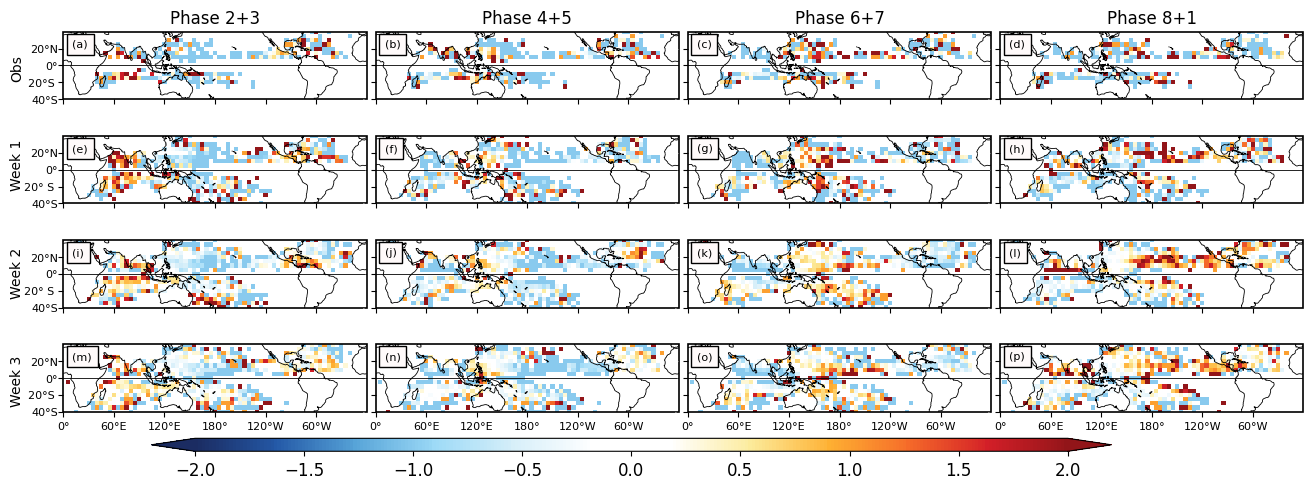

In [16]:
# Define the extent and other plotting parameters
lon_min = 0
lon_max = 360
lat_min = -40
lat_max = 40

# Adjust the latitude and longitude grid to match your data shape
lat = np.linspace(lat_min, lat_max, 17)  # 17 latitude points (matches data shape)
lon = np.linspace(lon_min, lon_max, 73)  # 73 longitude points (matches data shape)
lon_grid_mesh, lat_grid_mesh = np.meshgrid(lon, lat)

extent = [lon_min, lon_max, lat_min, lat_max]

#extent = [lon_min, lon_max, lat_min, lat_max]

# Create subplots with Cartopy, set the central longitude to 180
fig, axes = plt.subplots(4, 4, figsize=(16, 5.4),
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                         gridspec_kw={'height_ratios': [1, 1, 1, 1], 'hspace': 0.01, 'wspace': 0.03})
# Assign individual axes for easier customization
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3]
ax5, ax6, ax7, ax8 = axes[1, 0], axes[1, 1], axes[1, 2], axes[1, 3]
ax9, ax10, ax11, ax12 = axes[2, 0], axes[2, 1], axes[2, 2], axes[2, 3]
ax13, ax14, ax15, ax16 = axes[3, 0], axes[3, 1], axes[3, 2], axes[3, 3]


# Function to format each axis in the grid
def format_axis(ax, row):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor="k")
    ax.add_feature(cfeature.LAND, color="white") #color="white"
    ax.add_feature(cfeature.OCEAN, color="white")
    
    # Draw parallels and meridians with custom ticks
    #ax.gridlines(draw_labels=False, linewidth=0.2, color='gray', linestyle='--')
    
    # Set specific parallels and meridians
    parallels = np.arange(-40, 40, 20)  # Latitudes: -40, -20, 0, 20
    meridians = np.arange(0, 360, 60)  # Longitudes: -180, -120, -60, 0, 60, 120, 180
    ax.set_yticks(parallels, crs=ccrs.PlateCarree())
    ax.set_xticks(meridians, crs=ccrs.PlateCarree())
    
    # Set x-tick label colors: white for the first 3 rows, black for the 4th row
    #label_color = 'white' if row < 3 else 'k'
    #ax.tick_params(axis='x', labelsize=10, labelcolor=label_color)
    
    # Set y-tick label size: 10 for the first row, very small for others
    y_label_size = 0 if row == 0 else 0.00001
    ax.tick_params(axis='y', labelsize=y_label_size, labelcolor='white')
    
    # Set x-tick label size: 10 for the last row, very small for others
    x_label_size = 0 if row == 3 else 0.00001
    ax.tick_params(axis='x', labelsize=x_label_size, labelcolor='white')
    
    # Customize the labels for the last row
    # Customize the labels for the last row if the row is 3

# Loop over each axis and add pcolormesh
data_list = [phase_23_obs, phase_45_obs, phase_67_obs, phase_81_obs,
             phase_23_week1, phase_45_week1, phase_67_week1, phase_81_week1,
             phase_23_week2, phase_45_week2, phase_67_week2, phase_81_week2,
             phase_23_week3, phase_45_week3, phase_67_week3, phase_81_week3]

import matplotlib.colors as mcolors

# Define the levels for the colorbar (20 divisions between -2 and 2)
levels = np.linspace(-2, 2, 100)  # 21 boundaries create 20 divisions

# Create a BoundaryNorm object to map data values to discrete colors
#norm = mcolors.BoundaryNorm(levels, ncolors=cmaps.BlueWhiteOrangeRed.N)

import numpy.ma as ma 

# Loop over each axis and add pcolormesh
for idx, (ax, data) in enumerate(zip(axes.flat, data_list)):
    row = idx // 4  # Calculate the row index (0 to 3)
    format_axis(ax, row)  # Format the axis with coastlines, land, and ocean features

    masked_data = ma.masked_where(data == 0, data)
    
    pcolormesh = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, masked_data,
                               cmap=cmaps.BlueWhiteOrangeRed, vmin=-2, vmax=2, transform=ccrs.PlateCarree()) #cmaps.BlueWhiteOrangeRed   cmaps.BlueWYellowRed 



# Add colorbar
#cbar = fig.colorbar(pcolormesh, ax=axes[0, 0], orientation='horizontal', fraction=0.05, pad=0.05)
# Add colorbar
# You can add the colorbar after the loop, using the pcolormesh object from the first axis

# Make sure the extent includes the range of longitudes you're labeling
ax13.set_extent([0, 360, lat_min, lat_max], crs=ccrs.PlateCarree())

# Now, set the specific longitude ticks and labels for ax13
#ax13.set_xticks([0, 60, 120, 180, 240, 300])
ax13.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax14.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax15.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax16.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])


# Optionally, adjust the labels to ensure visibility (font size, position)
ax13.tick_params(axis='x', labelsize=8, labelcolor='black')  # Change 'black' to any color you prefer
ax14.tick_params(axis='x', labelsize=8, labelcolor='black')  # Change 'black' to any color you prefer
ax15.tick_params(axis='x', labelsize=8, labelcolor='black')  # Change 'black' to any color you prefer
ax16.tick_params(axis='x', labelsize=8, labelcolor='black')  # Change 'black' to any color you prefer


ax1.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax5.set_yticklabels(['40°S', '20° S ', '0°', '20°N'])
ax9.set_yticklabels(['40°S', '20° S ', '0°', '20°N'])
ax13.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])

# Optionally, adjust the labels to ensure visibility (font size, position)
ax1.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  # Change 'black' to any color you prefer
ax5.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  # Change 'black' to any color you prefer
ax9.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  # Change 'black' to any color you prefer
ax13.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  # Change 'black' to any color you prefer


fig.text(0.096, 0.78, 'Obs', ha='center', va='center', rotation='vertical',fontsize=10)
fig.text(0.096, 0.6, 'Week 1', ha='center', va='center', rotation='vertical',fontsize=10)
fig.text(0.096, 0.4, 'Week 2', ha='center', va='center', rotation='vertical',fontsize=10)
fig.text(0.096, 0.2, 'Week 3', ha='center', va='center', rotation='vertical',fontsize=10)

ax1.set_title('Phase 2+3', fontsize=12,loc='center')
ax2.set_title('Phase 4+5', fontsize=12,loc='center')
ax3.set_title('Phase 6+7', fontsize=12,loc='center')
ax4.set_title('Phase 8+1', fontsize=12,loc='center')

# List of axes to apply the text labels
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]

# Loop through the axes and add the corresponding label
for i, ax in enumerate(axes_list):
    label = f'({chr(97 + i)})'  # Generate labels like '(a)', '(b)', etc.
    ax.text(0.03, 0.77, label, transform=ax.transAxes, fontsize=8, color='k', 
            bbox=dict(facecolor='snow', alpha=1, edgecolor='k'))


axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
for ax in axes:
    ax.axhline(0, color='k', linewidth=0.6)
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
    

cbar_axx = fig.add_axes([0.180, 0.07, 0.6, 0.024])  # Adjust the values as needed
cbarr = fig.colorbar(pcolormesh, cax=cbar_axx, orientation='horizontal', extend='both', drawedges=False)
cbarr.ax.tick_params(labelsize=12)

#plt.subplots_adjust(wspace=0.05, hspace=0.14)
#plt.savefig('Figures/Figure13.png', dpi=400, bbox_inches='tight')

plt.show()
